In [175]:
import pytesseract as ocr
from PIL import ImageOps, Image
import time
import pyautogui
import re
import os
from string import punctuation
import sys
from spellchecker import SpellChecker  # Importa o módulo de correção ortográfica

In [2]:
utils_path = os.path.abspath("../")
if utils_path not in sys.path:
    sys.path.append(utils_path)

In [3]:
import utils.function as f

In [32]:
tesseract = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
ocr.pytesseract.tesseract_cmd=tesseract

In [131]:
f.ShowWindow('Perfect World') #Abre a Janela do pw

error: (0, 'SetForegroundWindow', 'No error message is available')

In [133]:
botao_purificar = f.LocateButton(r'../image/1920x1080/purificacao.png') #Localiza as coordenadas X e Y do botao reproduzir

In [135]:
def change_red_to_green_rgb(img):
    # Convert image to RGB
    img = img.convert("RGB")
    data = img.getdata()

    new_data = []
    for item in data:
        # Change all pixels that are significantly red to green
        if item[0] > 150 and item[1] < 100 and item[2] < 100:
            # Change red to green
            new_data.append((245, 210, 78))  # amarelo
        else:
            new_data.append(item)

    img.putdata(new_data)
    return img

In [140]:
i = 0
botao_purificar = f.LocateButton(r'../image/1920x1080/purificacao.png') #Localiza as coordenadas X e Y do botao reproduzir

while(i < 10):

    
    
    pyautogui.click(botao_purificar[0],botao_purificar[1])
    time.sleep(.5) #Espera 1.5 segundos para forjar o item

    AreaAdds_X, AreaAdds_Y = {}, {}

    AreaAdds_X[0], AreaAdds_X[1] = int(botao_purificar[0]), int(botao_purificar[0]+190) 
    AreaAdds_Y[0], AreaAdds_Y[1] = int(botao_purificar[1]-265), int(botao_purificar[1]-113)

    imagem = pyautogui.screenshot(r'..\image\screenShot.bmp')
    area = (AreaAdds_X[0], AreaAdds_Y[0], AreaAdds_X[1], AreaAdds_Y[1]) #Defino o tamanho e o local da area a ser corada na imagem
    cropped_img = imagem.crop(area) #Corta a area na imagem onde ficam os adds
    # cropped_img.show() #Mostra a imagem cortada

    cropped_img = change_red_to_green_rgb(cropped_img)

    gray_img = cropped_img.convert('L')

    img_op = ImageOps.invert(cropped_img) #Inverte as cores para facilitar a leitura dos adds
    # img_op.show()

    txt_adds = ocr.image_to_string(img_op) #Extrai o texto da imagem e coloca na variavel
    # print(txt_adds)

    for add in txt_adds.split('\n'):
        if 'Defesa' in add:
            quant_def = int(add.split()[-1])
            if quant_def > 10:
                pyautogui.alert('Parabéns, conseguimos ','I.A do John','OK')
                os.remove(r'image\screenShot.bmp')
                exit() #fecha o programa

    pyautogui.click(botao_purificar[0]-50,botao_purificar[1]) #Clica em manter o antigo add
    i+=1
    time.sleep(.5)

# TESTEs

In [217]:
import re

In [273]:
botao_purificar = f.LocateButton(r'../image/1920x1080/purificacao.png') #Localiza as coordenadas X e Y do botao reproduzir

AreaAdds_X, AreaAdds_Y = {}, {}

AreaAdds_X[0], AreaAdds_X[1] = int(botao_purificar[0]), int(botao_purificar[0]+190) 
AreaAdds_Y[0], AreaAdds_Y[1] = int(botao_purificar[1]-265), int(botao_purificar[1]-113)

In [275]:
imagem = pyautogui.screenshot(r'..\image\screenShot.bmp')
area = (AreaAdds_X[0], AreaAdds_Y[0], AreaAdds_X[1], AreaAdds_Y[1]) #Defino o tamanho e o local da area a ser corada na imagem
cropped_img = imagem.crop(area) #Corta a area na imagem onde ficam os adds
# cropped_img.show() #Mostra a imagem cortada

cropped_img = change_red_to_green_rgb(cropped_img)

gray_img = cropped_img.convert('L')

img_op = ImageOps.invert(gray_img) #Inverte as cores para facilitar a leitura dos adds
# img_op.show()

txt_adds = ocr.image_to_string(img_op) #Extrai o texto da imagem e coloca na variavel

txt_adds.split('\n')

['Intelghncia +84', 'HP 4539', '', 'Def 4780', 'Def +767', '', 'spit +68', '']

In [272]:
spite 973
spit +68

'865'

In [256]:

numeros = re.findall(r'\d+', 'Tempo de Canalzaylo -11°')
numeros

['11']

In [254]:
valor_numerico

439

In [188]:
mapeamento = {
    "Tempo de Canalzatlo-#%" : "Tempo de Canalização -8%",
    'Tempo de Canalizayéo -7%' : 'Tempo de Canalização -7%',
    'HP Max 46%' : 'HP Max +6%',
    'HP Max 47%' : 'HP Max +7%',
    'HP Max 48%' : 'HP Max +8%',
    'HP Max 10%': 'HP Max +10%',
    'HP Max 40%': 'HP Max +10%',
    'HP Mo 11%' : 'HP Max 11%',
    'Conetitipdo 234': 'Constituição +34',
    'spite 04': 'Espirito +94'
}

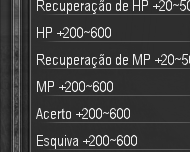

In [259]:
gray_img

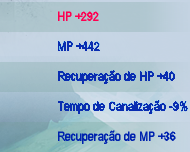

In [199]:
img_op